In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from scipy.spatial.distance import euclidean
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [2]:
# membaca data

data = pd.read_excel('Data Skripsi 2023_2PCA.xlsx')
data

,Kab/Kota,PC1,PC2
0,Pacitan,1.632153,-2.304701
1,Ponorogo,-0.158697,-1.236645
2,Trenggalek,0.188841,-1.512638
3,Tulungagung,-0.923713,-0.867229
4,Blitar,-0.010199,-0.752552
5,Kediri,1.243439,0.048840
6,Malang,-0.056135,1.149632
7,Lumajang,0.898620,-1.157387
8,Jember,1.492339,0.251685
9,Banyuwangi,-0.628639,-0.850132


In [3]:
# mengambil fitur-fitur tertentu dalam data yang akan digunakan dalam perhitungan kmeans

clustering_data = data.iloc[:, 1:].values

clustering_data

array([[ 1.6321527 , -2.30470125],
       [-0.1586972 , -1.23664479],
       [ 0.18884106, -1.51263751],
       [-0.92371323, -0.86722895],
       [-0.01019948, -0.75255181],
       [ 1.24343906,  0.04883955],
       [-0.05613465,  1.14963198],
       [ 0.8986205 , -1.15738745],
       [ 1.49233896,  0.25168465],
       [-0.62863926, -0.85013249],
       [ 2.02167016, -0.24913556],
       [ 1.64002796, -1.1941959 ],
       [ 3.23757291,  1.1775223 ],
       [-0.08705273,  1.66743557],
       [-3.57498334,  2.46477219],
       [-0.2461756 ,  1.80292807],
       [-0.46345381,  0.03489003],
       [ 0.16216853, -0.18738173],
       [ 0.19925514, -0.66732052],
       [-0.682552  , -1.18104581],
       [ 2.04107421, -0.65923779],
       [ 2.25721022,  0.16744468],
       [ 1.31429291,  0.44436488],
       [ 1.29744978,  0.25658768],
       [-1.01281618,  2.85912269],
       [ 4.19801946,  1.7181735 ],
       [ 5.30764293,  0.43896192],
       [ 2.03242598, -1.224556  ],
       [ 5.22944896,

In [4]:
# Langkah 1: Hitung jarak Euclidean dari titik asal (0, 0) untuk setiap data
distances = [np.linalg.norm(point) for point in clustering_data]
distances

[2.8241052174965153,
 1.2467859184335233,
 1.5243796076688223,
 1.2670170391159508,
 0.7526209267256175,
 1.2443978437999559,
 1.1510016424554468,
 1.4652864932020253,
 1.5134136042253457,
 1.0573138437169458,
 2.0369631182579133,
 2.028742358836518,
 3.4450598106666708,
 1.6697064235992451,
 4.342304434649715,
 1.819657122586268,
 0.46476526090481557,
 0.247811511048387,
 0.6964332593391754,
 1.3640917986241057,
 2.144895890603457,
 2.263412396717148,
 1.3873809831182526,
 1.3225782248750746,
 3.0332126828295323,
 4.536021116690135,
 5.325763892422315,
 2.3728237963410335,
 5.345361132442428,
 2.602828141929016,
 4.2672346161753465,
 4.382477359040146,
 2.1655573989641104,
 2.0129132834158026,
 2.419940261695562,
 4.037256105921334,
 5.129352477735068,
 3.190974342848795]

In [5]:
# Urutkan data berdasarkan jarak (terkecil ke terbesar)
sorted_indices = np.argsort(distances)
sorted_data = clustering_data[sorted_indices]
sorted_data

array([[ 0.16216853, -0.18738173],
       [-0.46345381,  0.03489003],
       [ 0.19925514, -0.66732052],
       [-0.01019948, -0.75255181],
       [-0.62863926, -0.85013249],
       [-0.05613465,  1.14963198],
       [ 1.24343906,  0.04883955],
       [-0.1586972 , -1.23664479],
       [-0.92371323, -0.86722895],
       [ 1.29744978,  0.25658768],
       [-0.682552  , -1.18104581],
       [ 1.31429291,  0.44436488],
       [ 0.8986205 , -1.15738745],
       [ 1.49233896,  0.25168465],
       [ 0.18884106, -1.51263751],
       [-0.08705273,  1.66743557],
       [-0.2461756 ,  1.80292807],
       [-2.01251534, -0.04002388],
       [ 1.64002796, -1.1941959 ],
       [ 2.02167016, -0.24913556],
       [ 2.04107421, -0.65923779],
       [-2.1486141 , -0.27036326],
       [ 2.25721022,  0.16744468],
       [ 2.03242598, -1.224556  ],
       [-2.34355175, -0.60322143],
       [-2.37517426, -1.0645476 ],
       [ 1.6321527 , -2.30470125],
       [-1.01281618,  2.85912269],
       [-3.10465722,

In [6]:
# WCSS untuk berbagai jumlah kluster
wcss = []

for k in range(1, 11):  # Mulai dari 1 hingga 10 kluster
    # Bagi data menjadi k bagian
    parts = np.array_split(sorted_data, k)
    
    # Hitung centroid hybrid ((mean + median) / banyak data dalam kelompok) untuk setiap bagian
    initial_centroids = []
    for part in parts:
        mean = np.mean(part, axis=0)
        median = np.median(part, axis=0)
        hybrid = (mean + median) / len(part)
        initial_centroids.append(hybrid)
    initial_centroids = np.array(initial_centroids)  # Konversi ke array
# Jalankan K-Means dengan centroid awal
    kmeans = KMeans(n_clusters=k, init=initial_centroids, n_init=1)
    kmeans.fit(clustering_data)
    wcss.append(kmeans.inertia_)

print(wcss)

C:\Users\Aisyah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Aisyah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Aisyah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Aisyah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

[287.48574479845274, 145.73841152057673, 87.74099750909105, 69.24543637927762, 48.983009357317485, 42.888798794730604, 20.553918987943774, 18.980749309673374, 16.210007396338355, 18.682896263771]


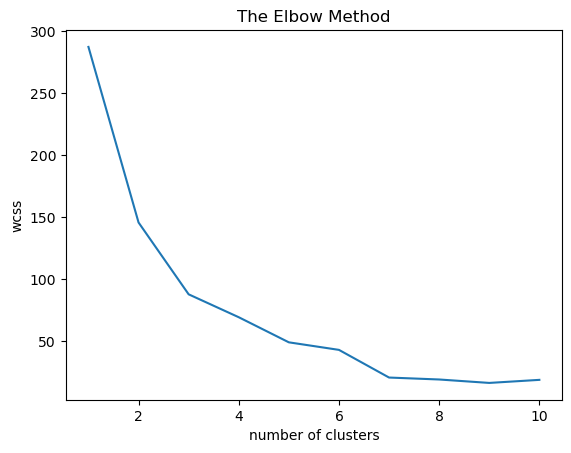

In [7]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

In [8]:
silhouette_scores = []

# Loop untuk menghitung silhouette score untuk setiap k
for k in range(2, 11):  # Mulai dari 1 hingga 10 kluster
    # Bagi data menjadi k bagian
    parts = np.array_split(sorted_data, k)
    
    # Hitung centroid hybrid ((mean + median) / banyak data dalam kelompok) untuk setiap bagian
    initial_centroids = []
    for part in parts:
        mean = np.mean(part, axis=0)
        median = np.median(part, axis=0)
        hybrid = (mean + median) / len(part)
        initial_centroids.append(hybrid)
    initial_centroids = np.array(initial_centroids)  # Konversi ke array
    # Jalankan silhouette masing-masing cluster
    kmeans = KMeans(n_clusters=k, init=initial_centroids, n_init=1)
    cluster_labels = kmeans.fit_predict(clustering_data)
    score = silhouette_score(clustering_data, cluster_labels)
    silhouette_scores.append(score)
silhouette_scores

C:\Users\Aisyah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Aisyah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Aisyah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Aisyah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

[0.38603634804035103,
 0.4551602205718241,
 0.35788443097286904,
 0.3739995625925504,
 0.4342054435576762,
 0.5053909078528177,
 0.44668960559006676,
 0.4340325023027316,
 0.3894744693235559]

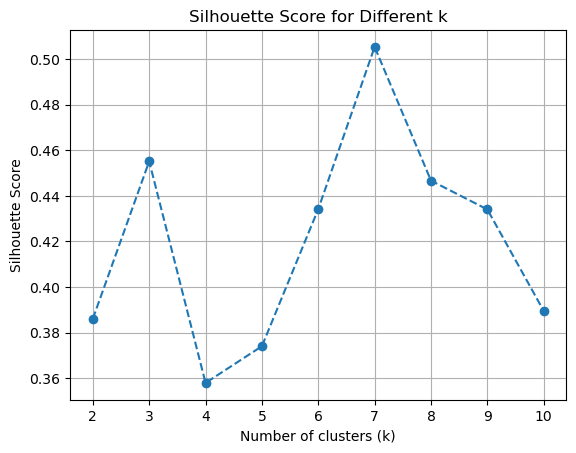

In [9]:
# Visualisasi Silhouette Score untuk tiap k
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score for Different k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

In [10]:
dbi = {}

for k in range(2,11): # Mulai dari 1 hingga 10 kluster
    # Bagi data menjadi k bagian
    parts = np.array_split(sorted_data, k)
    
    # Hitung centroid hybrid ((mean + median) / banyak data dalam kelompok) untuk setiap bagian
    initial_centroids = []
    for part in parts:
        mean = np.mean(part, axis=0)
        median = np.median(part, axis=0)
        hybrid = (mean + median) / len(part)
        initial_centroids.append(hybrid)
    initial_centroids = np.array(initial_centroids)  # Konversi ke array
    # Jalankan silhouette masing-masing cluster
    kmeans = KMeans(n_clusters=k, init=initial_centroids, n_init=1)
    cluster_labels = kmeans.fit_predict(clustering_data)
    db_index = davies_bouldin_score(clustering_data, cluster_labels)
    dbi.update({k: db_index})
dbi

C:\Users\Aisyah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Aisyah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Aisyah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Aisyah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

{2: 0.9017960336436135,
 3: 0.7275745830082946,
 4: 0.9081819220120703,
 5: 0.9110342178509463,
 6: 0.6465533073335031,
 7: 0.5664574445119438,
 8: 0.6773465947761432,
 9: 0.6622289827535851,
 10: 0.5827172844979096}

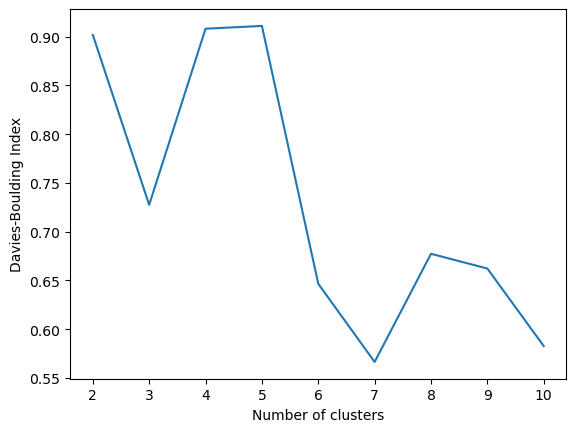

In [11]:
plt.plot(list(dbi.keys()), list(dbi.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Boulding Index")
plt.show()

In [12]:
# Langkah 1: Hitung jarak Euclidean dari titik asal (0, 0) untuk setiap data
distances = [np.linalg.norm(point) for point in clustering_data]
distances

[2.8241052174965153,
 1.2467859184335233,
 1.5243796076688223,
 1.2670170391159508,
 0.7526209267256175,
 1.2443978437999559,
 1.1510016424554468,
 1.4652864932020253,
 1.5134136042253457,
 1.0573138437169458,
 2.0369631182579133,
 2.028742358836518,
 3.4450598106666708,
 1.6697064235992451,
 4.342304434649715,
 1.819657122586268,
 0.46476526090481557,
 0.247811511048387,
 0.6964332593391754,
 1.3640917986241057,
 2.144895890603457,
 2.263412396717148,
 1.3873809831182526,
 1.3225782248750746,
 3.0332126828295323,
 4.536021116690135,
 5.325763892422315,
 2.3728237963410335,
 5.345361132442428,
 2.602828141929016,
 4.2672346161753465,
 4.382477359040146,
 2.1655573989641104,
 2.0129132834158026,
 2.419940261695562,
 4.037256105921334,
 5.129352477735068,
 3.190974342848795]

In [13]:
# Urutkan data berdasarkan jarak (terkecil ke terbesar)
sorted_indices = np.argsort(distances)
sorted_data = clustering_data[sorted_indices]
sorted_data

array([[ 0.16216853, -0.18738173],
       [-0.46345381,  0.03489003],
       [ 0.19925514, -0.66732052],
       [-0.01019948, -0.75255181],
       [-0.62863926, -0.85013249],
       [-0.05613465,  1.14963198],
       [ 1.24343906,  0.04883955],
       [-0.1586972 , -1.23664479],
       [-0.92371323, -0.86722895],
       [ 1.29744978,  0.25658768],
       [-0.682552  , -1.18104581],
       [ 1.31429291,  0.44436488],
       [ 0.8986205 , -1.15738745],
       [ 1.49233896,  0.25168465],
       [ 0.18884106, -1.51263751],
       [-0.08705273,  1.66743557],
       [-0.2461756 ,  1.80292807],
       [-2.01251534, -0.04002388],
       [ 1.64002796, -1.1941959 ],
       [ 2.02167016, -0.24913556],
       [ 2.04107421, -0.65923779],
       [-2.1486141 , -0.27036326],
       [ 2.25721022,  0.16744468],
       [ 2.03242598, -1.224556  ],
       [-2.34355175, -0.60322143],
       [-2.37517426, -1.0645476 ],
       [ 1.6321527 , -2.30470125],
       [-1.01281618,  2.85912269],
       [-3.10465722,

In [14]:
# Bagi data menjadi k bagian
parts = np.array_split(sorted_data, 7)
parts

[array([[ 0.16216853, -0.18738173],
        [-0.46345381,  0.03489003],
        [ 0.19925514, -0.66732052],
        [-0.01019948, -0.75255181],
        [-0.62863926, -0.85013249],
        [-0.05613465,  1.14963198]]),
 array([[ 1.24343906,  0.04883955],
        [-0.1586972 , -1.23664479],
        [-0.92371323, -0.86722895],
        [ 1.29744978,  0.25658768],
        [-0.682552  , -1.18104581],
        [ 1.31429291,  0.44436488]]),
 array([[ 0.8986205 , -1.15738745],
        [ 1.49233896,  0.25168465],
        [ 0.18884106, -1.51263751],
        [-0.08705273,  1.66743557],
        [-0.2461756 ,  1.80292807],
        [-2.01251534, -0.04002388]]),
 array([[ 1.64002796, -1.1941959 ],
        [ 2.02167016, -0.24913556],
        [ 2.04107421, -0.65923779],
        [-2.1486141 , -0.27036326],
        [ 2.25721022,  0.16744468]]),
 array([[ 2.03242598, -1.224556  ],
        [-2.34355175, -0.60322143],
        [-2.37517426, -1.0645476 ],
        [ 1.6321527 , -2.30470125],
        [-1.01281618

In [15]:
# Hitung mean, median, dan centroid hybrid ((mean + median) / banyak data dalam kelompok) untuk setiap bagian
initial_centroids = []
for part in parts:
    mean = np.mean(part, axis=0)
    median = np.median(part, axis=0)
    hybrid = (mean + median) / len(part)
    initial_centroids.append(hybrid)
initial_centroids = np.array(initial_centroids)
initial_centroids

array([[-0.02766683, -0.10658254],
       [ 0.1484568 , -0.13861932],
       [ 0.01498394,  0.04574949],
       [ 0.63678877, -0.14229217],
       [-0.28524177, -0.30642566],
       [-1.1681095 , -0.12949536],
       [ 1.08184962,  0.49706368]])

In [16]:
# Jalankan K-Means dengan centroid hybrid

iterations = kmeans.n_iter_

sse_values = []

for i in range(iterations):
    kmeans = KMeans(n_clusters=7, init='random', n_init=1)
    kmeans.fit(clustering_data)
    centroids = kmeans.cluster_centers_
    sse = kmeans.inertia_  
    sse_values.append(sse)
    print(f'iter: {i} - first: {centroids[0]}, second: {centroids[1]}, SSE: {sse}')
    
print(f"Jumlah iterasi: ", iterations)


C:\Users\Aisyah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Aisyah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


iter: 0 - first: [ 1.6321527  -2.30470125], second: [1.60440018 0.15329765], SSE: 38.677591835034164
iter: 1 - first: [-0.25744336 -0.80222817], second: [-0.35054479  1.86977958], SSE: 20.553918987943774
iter: 2 - first: [4.91170378 1.08809034], second: [-3.21242173  0.09194345], SSE: 38.29068482884864
iter: 3 - first: [-0.27364971  0.01492243], second: [ 1.93379958 -0.83178131], SSE: 35.94259049625852
Jumlah iterasi:  4


C:\Users\Aisyah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Aisyah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [17]:
# Hasil clustering
print("Centroid Awal (Hybrid):")
print(initial_centroids)
print("\nCluster Centers (Hasil Akhir):")
print(kmeans.cluster_centers_)

Centroid Awal (Hybrid):
[[-0.02766683 -0.10658254]
 [ 0.1484568  -0.13861932]
 [ 0.01498394  0.04574949]
 [ 0.63678877 -0.14229217]
 [-0.28524177 -0.30642566]
 [-1.1681095  -0.12949536]
 [ 1.08184962  0.49706368]]

Cluster Centers (Hasil Akhir):
[[-0.27364971  0.01492243]
 [ 1.93379958 -0.83178131]
 [ 4.49317106  1.11044833]
 [ 1.52094618  0.23378429]
 [ 0.64022926 -1.55284275]
 [-2.83860941 -0.73885439]
 [-3.3166919   2.23763447]]


In [18]:
cluster_predictions = kmeans.fit_predict(clustering_data)
clusters = np.column_stack((clustering_data, cluster_predictions))
clusters

C:\Users\Aisyah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([[ 1.6321527 , -2.30470125,  2.        ],
       [-0.1586972 , -1.23664479,  0.        ],
       [ 0.18884106, -1.51263751,  0.        ],
       [-0.92371323, -0.86722895,  0.        ],
       [-0.01019948, -0.75255181,  0.        ],
       [ 1.24343906,  0.04883955,  4.        ],
       [-0.05613465,  1.14963198,  6.        ],
       [ 0.8986205 , -1.15738745,  2.        ],
       [ 1.49233896,  0.25168465,  4.        ],
       [-0.62863926, -0.85013249,  0.        ],
       [ 2.02167016, -0.24913556,  4.        ],
       [ 1.64002796, -1.1941959 ,  2.        ],
       [ 3.23757291,  1.1775223 ,  1.        ],
       [-0.08705273,  1.66743557,  6.        ],
       [-3.57498334,  2.46477219,  5.        ],
       [-0.2461756 ,  1.80292807,  6.        ],
       [-0.46345381,  0.03489003,  0.        ],
       [ 0.16216853, -0.18738173,  0.        ],
       [ 0.19925514, -0.66732052,  0.        ],
       [-0.682552  , -1.18104581,  0.        ],
       [ 2.04107421, -0.65923779,  4.   

In [19]:
#berhenti

In [20]:
score = silhouette_score(clustering_data, kmeans.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.506
